#Libery File and Dataset Loading

In [278]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [279]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold,cross_val_score,cross_validate
import numpy as np

In [280]:
df = pd.read_csv('/content/drive/MyDrive/Thesis/dataset.csv')
df.head()

,Race,Student Name,class,Father Name,Father Monthly Income,F. education (class),Father NID,Mother Name,Mother Monthly Income,M. education (class),No. of family members,No. of edu. Family member ( up to 10),High edu. Level of adult ( up to 11),Location,Gender,Neighbour,Go to School
0,marma,Youong Marma,5,Monghla Prue,23000,class 10,NaN,NaN,9000,clas 8,4,1,1,Gunguru Mukh Para,male,4,yes
1,marma,hleame,6,Mongkya Hla,20000,class 5,3445620980,NaN,0,class 10,5,2,1,Chemidolu Para,male,4,drop
2,marma,swe sing marma,4,Aching marma,9500,class 9,3.10E+11,thwe nu ching marma,3000,class 10,5,3,2,janka para,male,1,yes
3,marma,u kya marma,4,raching u marma,18000,class 9,7345351088,Hla nue ching marma,8000,class 10,6,2,2,janka para,male,4,yes
4,marma,U ching nu marma,8,Mathwe ching marma,14000,class 9,3.10E+11,Swe nu ma marma,8000,class 10,4,2,2,janka para,male,3,yes


#Preprocessing

In [281]:
df = df.drop(['Student Name','Father Name','Father NID','Mother Name','Gender','Location','Race','High edu. Level of  adult ( up to 11)'],axis=1)

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   class                                  653 non-null    int64 
 1   Father Monthly Income                  653 non-null    int64 
 2   F. education (class)                   653 non-null    object
 3   Mother Monthly Income                  653 non-null    int64 
 4   M. education (class)                   653 non-null    object
 5   No. of family members                  653 non-null    int64 
 6   No. of edu. Family member ( up to 10)  653 non-null    int64 
 7   Neighbour                              653 non-null    int64 
 8   Go to School                           653 non-null    object
dtypes: int64(6), object(3)
memory usage: 46.0+ KB


In [283]:
print(df['F. education (class)'].unique())
df['F. education (class)'] = df['F. education (class)'].map({'class 8':8, 'class 10':10, 'class 9':9, 'class 12':12, 'class 11':11,
       'class 7':7, 'class 5':5, 'class 6':6, 'class 4':4})
print(df['F. education (class)'].unique())

['class 10' 'class 5' 'class 9' 'class 12' 'class 11' 'class 8' 'class 7'
 'class 6' 'class 4']
[10  5  9 12 11  8  7  6  4]


In [284]:
print(df['M. education (class)'].unique())
df['M. education (class)'] = df['M. education (class)'].map({'class 5':5, 'class 8':8, 'class 10':10, 'class 7':7, 'class 9':9,
       'class 10 ':10, 'class 6':6, 'class 4':4, 'class 3':3, 'clas 8':8, 'classs 8':8,
       'class 0':0})
print(df['M. education (class)'].unique())

['clas 8' 'class 10' 'class 10 ' 'class 3' 'class 4' 'class 5' 'class 6'
 'class 7' 'class 8' 'class 9' 'classs 8']
[ 8 10  3  4  5  6  7  9]


In [285]:
# print(df['Gender'].unique())
# df['Gender'] = df['Gender'].map({'male':1, 'female':0})
# print(df['Gender'].unique())

In [286]:
print(df['Go to School'].unique())
df['Go to School'] = df['Go to School'].map({'yes':1, 'drop':0})
print(df['Go to School'].unique())

['yes' 'drop']
[1 0]


In [287]:
# df.isna().sum()

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   class                                  653 non-null    int64
 1   Father Monthly Income                  653 non-null    int64
 2   F. education (class)                   653 non-null    int64
 3   Mother Monthly Income                  653 non-null    int64
 4   M. education (class)                   653 non-null    int64
 5   No. of family members                  653 non-null    int64
 6   No. of edu. Family member ( up to 10)  653 non-null    int64
 7   Neighbour                              653 non-null    int64
 8   Go to School                           653 non-null    int64
dtypes: int64(9)
memory usage: 46.0 KB


#Data Analysis

## pie chart

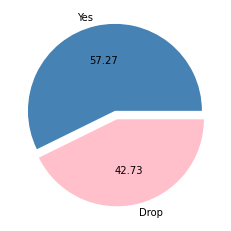

In [289]:
import matplotlib.pyplot as plt
%matplotlib inline
colors = ['steelblue','pink']
explode = (0.05, 0.05)
plt.pie(df['Go to School'].value_counts(), labels=['Yes','Drop'], autopct = "%0.2f", colors=colors, explode=explode)
plt.show()

##Class with Go to School

In [290]:
class_1_5_yes = 0
class_1_5_no = 0
class_6_8_yes = 0
class_6_8_no = 0
class_9_10_yes = 0
class_9_10_no = 0

In [291]:
for i in range(len(df)):

  if df['class'][i]>0 and df['class'][i]<6:
    if df['Go to School'][i] == 1:
      class_1_5_yes = class_1_5_yes+1
    else:
      class_1_5_no = class_1_5_no+1


  elif df['class'][i]>5 and df['class'][i]<9:
    if df['Go to School'][i] == 1:
      class_6_8_yes = class_6_8_yes+1
    else:
      class_6_8_no = class_6_8_no+1

  else:
    if df['Go to School'][i] == 1:
      class_9_10_yes = class_9_10_yes+1
    else:
      class_9_10_no = class_9_10_no+1

In [292]:
Class = []
Class.append({
    'class_range': '1-5',
    'total_population': class_1_5_yes,
    'go_to_school': 'yes'
})
Class.append({
    'class_range': '1-5',
    'total_population': class_1_5_no,
    'go_to_school': 'dropout'
})
Class.append({
    'class_range': '6-8',
    'total_population': class_6_8_yes,
    'go_to_school': 'yes'
})
Class.append({
    'class_range': '6-8',
    'total_population': class_6_8_no,
    'go_to_school': 'dropout'
})
Class.append({
    'class_range': '9-10',
    'total_population': class_9_10_yes,
    'go_to_school': 'yes'
})
Class.append({
    'class_range': '9-10',
    'total_population': class_9_10_no,
    'go_to_school': 'dropout'
})
Class = pd.DataFrame(Class)
Class.tail(3)

,class_range,total_population,go_to_school
3,6-8,99,dropout
4,9-10,89,yes
5,9-10,124,dropout


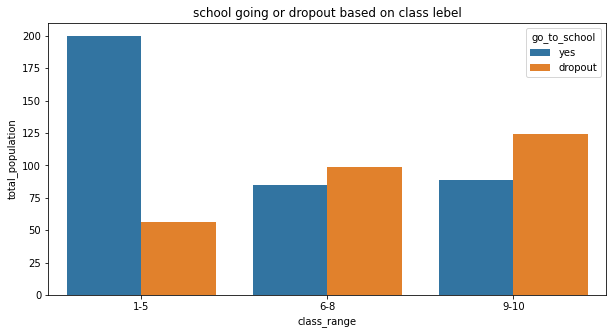

In [293]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.title('school going or dropout based on class lebel')
sns.barplot(x = 'class_range',y = 'total_population',hue = 'go_to_school',data = Class)
plt.show()

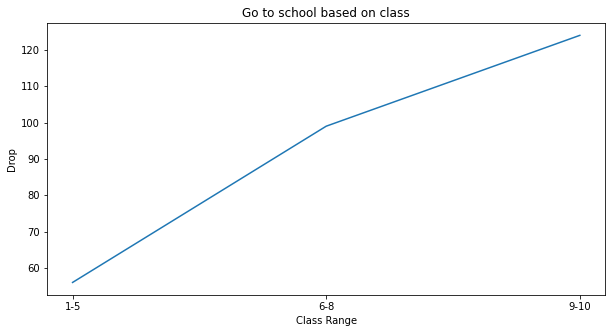

In [294]:
x = ['1-5','6-8','9-10']
y = [class_1_5_no,class_6_8_no,class_9_10_no]
plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.xlabel("Class Range")
plt.ylabel('Drop')
plt.title('Go to school based on class')
plt.savefig("class.jpg")

##Father & Mother Income

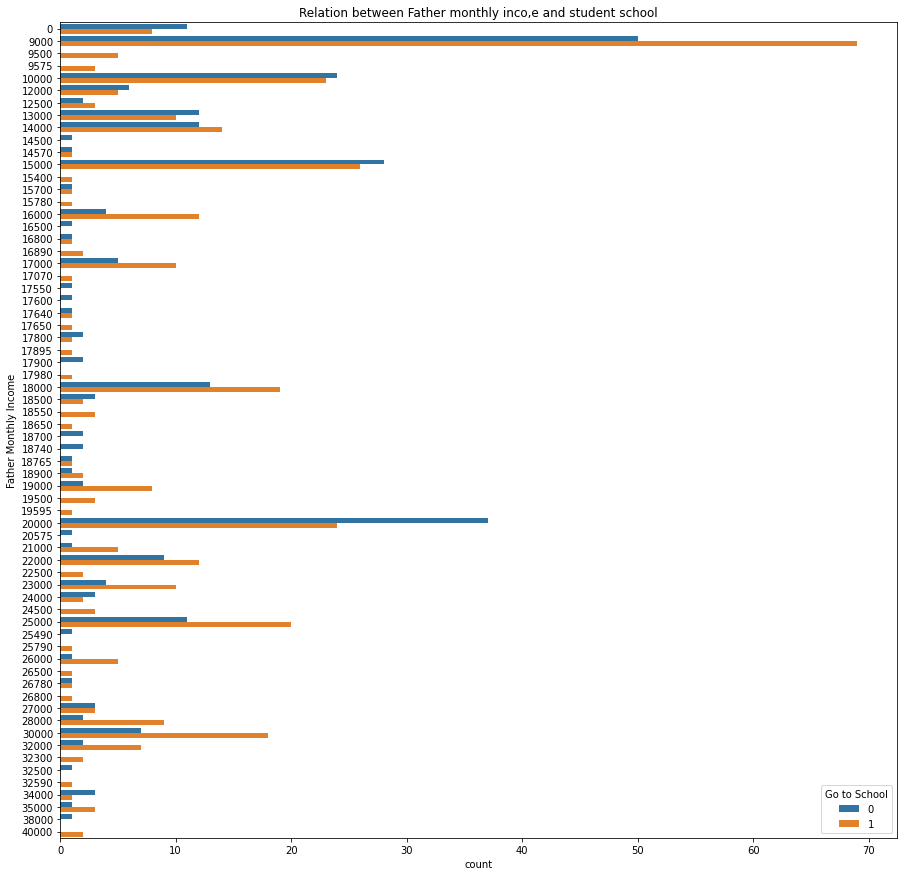

<Figure size 432x288 with 0 Axes>

In [295]:
plt.figure(figsize=(15,15))
plt.title('Relation between Father monthly inco,e and student school')
sns.countplot(data = df,y = 'Father Monthly Income',hue = 'Go to School')
plt.show()
plt.savefig("Father.png")

In [296]:
in_10_yes = 0
in_10_no = 0
in_15_yes = 0
in_15_no = 0
in_20_yes = 0
in_20_no = 0
in_25_yes = 0
in_25_no = 0
in_30_yes = 0
in_30_no = 0
in_35_yes = 0
in_35_no = 0
in_40_yes = 0
in_40_no = 0

In [297]:
for i in range(len(df)):

  if df['Father Monthly Income'][i]>=0 and df['Father Monthly Income'][i]<=10000:
    if df['Go to School'][i] == 1:
      in_10_yes = in_10_yes+1
    else:
      in_10_no = in_10_no+1

  elif df['Father Monthly Income'][i]>10000 and df['Father Monthly Income'][i]<=15000:
    if df['Go to School'][i] == 1:
      in_15_yes = in_15_yes+1
    else:
      in_15_no = in_15_no+1
  
  elif df['Father Monthly Income'][i]>15000 and df['Father Monthly Income'][i]<=20000:
    if df['Go to School'][i] == 1:
      in_20_yes = in_20_yes+1
    else:
      in_20_no = in_20_no+1

  elif df['Father Monthly Income'][i]>20000 and df['Father Monthly Income'][i]<=25000:
    if df['Go to School'][i] == 1:
      in_25_yes = in_25_yes+1
    else:
      in_25_no = in_25_no+1

  elif df['Father Monthly Income'][i]>25000 and df['Father Monthly Income'][i]<=30000:
    if df['Go to School'][i] == 1:
      in_30_yes = in_30_yes+1
    else:
      in_30_no = in_30_no+1
  
  elif df['Father Monthly Income'][i]>30000 and df['Father Monthly Income'][i]<=35000:
    if df['Go to School'][i] == 1:
      in_35_yes = in_35_yes+1
    else:
      in_35_no = in_35_no+1

  else:
    if df['Go to School'][i] == 1:
      in_40_yes = in_40_yes+1
    else:
      in_40_yes = in_40_yes+1

In [298]:
father_income = []
father_income.append({
    'income_rane': '0-10000',
    'total_population': in_10_yes,
    'go_to_school': 'yes'
})
father_income.append({
    'income_rane': '0-10000',
    'total_population': in_10_no,
    'go_to_school': 'dropout'
})
father_income.append({
    'income_rane': '10000-15000',
    'total_population': in_15_yes,
    'go_to_school': 'yes'
})
father_income.append({
    'income_rane': '10000-15000',
    'total_population': in_15_no,
    'go_to_school': 'dropout'
})
father_income.append({
    'income_rane': '15000-20000',
    'total_population': in_20_yes,
    'go_to_school': 'yes'
})
father_income.append({
    'income_rane': '15000-20000',
    'total_population': in_20_no,
    'go_to_school': 'dropout'
})
father_income.append({
    'income_rane': '20000-25000',
    'total_population': in_25_yes,
    'go_to_school': 'yes'
})
father_income.append({
    'income_rane': '20000-25000',
    'total_population': in_25_no,
    'go_to_school': 'dropout'
})
father_income.append({
    'income_rane': '25000-30000',
    'total_population': in_30_yes,
    'go_to_school': 'yes'
})
father_income.append({
    'income_rane': '25000-30000',
    'total_population': in_30_no,
    'go_to_school': 'dropout'
})
father_income.append({
    'income_rane': '30000-35000',
    'total_population': in_35_yes,
    'go_to_school': 'yes'
})
father_income.append({
    'income_rane': '30000-35000',
    'total_population': in_35_no,
    'go_to_school': 'dropout'
})
father_income.append({
    'income_rane': '35000-higher',
    'total_population': in_40_yes,
    'go_to_school': 'yes'
})
father_income.append({
    'income_rane': '35000-higher',
    'total_population': in_40_no,
    'go_to_school': 'dropout'
})
father_income = pd.DataFrame(father_income)
father_income

,income_rane,total_population,go_to_school
0,0-10000,108,yes
1,0-10000,85,dropout
2,10000-15000,59,yes
3,10000-15000,62,dropout
4,15000-20000,98,yes
5,15000-20000,80,dropout
6,20000-25000,54,yes
7,20000-25000,29,dropout
8,25000-30000,39,yes
9,25000-30000,15,dropout


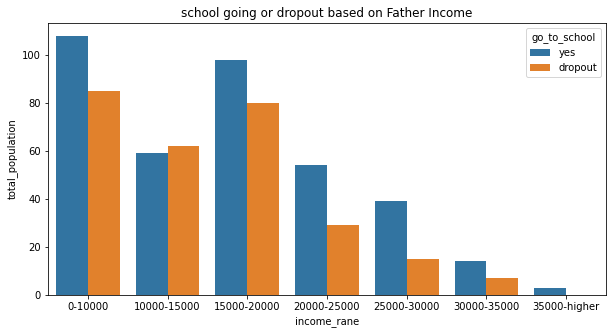

In [299]:
plt.figure(figsize=(10,5))
plt.title('school going or dropout based on Father Income')
sns.barplot(x = 'income_rane',y = 'total_population',hue = 'go_to_school',data = father_income)
plt.show()

Text(0.5, 1.0, 'Go to school based on Father Income')

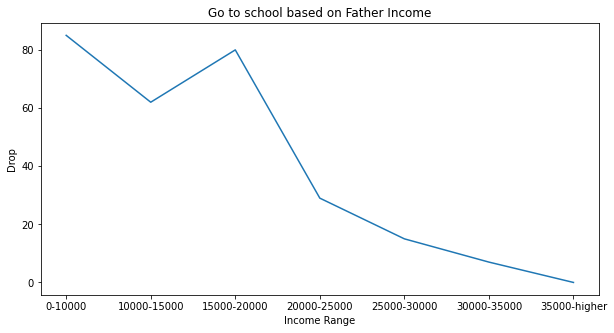

In [300]:
x = ['0-10000','10000-15000','15000-20000','20000-25000','25000-30000','30000-35000','35000-higher']
y = [in_10_no,in_15_no,in_20_no,in_25_no,in_30_no,in_35_no,in_40_no]
plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.xlabel("Income Range")
plt.ylabel('Drop')
plt.title('Go to school based on Father Income')

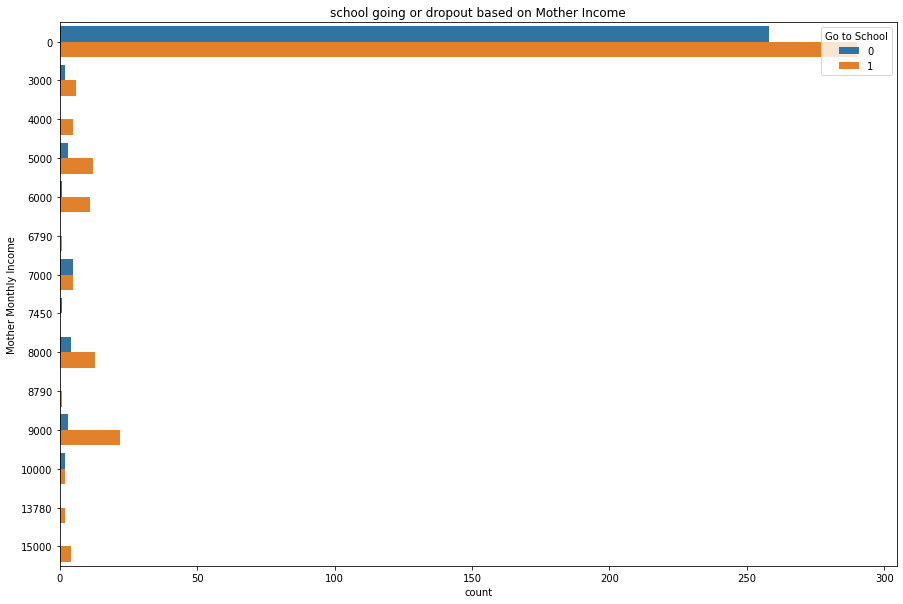

In [301]:
plt.figure(figsize=(15,10))
plt.title('school going or dropout based on Mother Income')
sns.countplot(data = df,y = 'Mother Monthly Income',hue = 'Go to School')
plt.show()

In [302]:
in_5_yes = 0
in_5_no = 0
in_10_yes = 0
in_10_no = 0
in_15_yes = 0
in_15_no = 0
in_20_yes = 0
in_20_no = 0

In [303]:
for i in range(len(df)):

  if df['Mother Monthly Income'][i]>=0 and df['Mother Monthly Income'][i]<=5000:
    if df['Go to School'][i] == 1:
      in_5_yes = in_5_yes+1
    else:
      in_5_no = in_5_no+1

  elif df['Mother Monthly Income'][i]>5000 and df['Mother Monthly Income'][i]<=10000:
    if df['Go to School'][i] == 1:
      in_10_yes = in_10_yes+1
    else:
      in_10_no = in_10_no+1

  elif df['Mother Monthly Income'][i]>10000 and df['Mother Monthly Income'][i]<=15000:
    if df['Go to School'][i] == 1:
      in_15_yes = in_15_yes+1
    else:
      in_15_no = in_15_no+1
  
  else:
    if df['Go to School'][i] == 1:
      in_20_yes = in_20_yes+1
    else:
      in_20_no = in_20_no+1

In [304]:
Mother_income = []
Mother_income.append({
    'income_range': '0-5000',
    'total_population': in_5_yes,
    'go_to_school': 'yes'
})
Mother_income.append({
    'income_range': '0-5000',
    'total_population': in_5_no,
    'go_to_school': 'dropout'
})
Mother_income.append({
    'income_range': '5000-10000',
    'total_population': in_10_yes,
    'go_to_school': 'yes'
})
Mother_income.append({
    'income_range': '5000-10000',
    'total_population': in_10_no,
    'go_to_school': 'dropout'
})
Mother_income.append({
    'income_range': '10000-15000',
    'total_population': in_15_yes,
    'go_to_school': 'yes'
})
Mother_income.append({
    'income_range': '10000-15000',
    'total_population': in_15_no,
    'go_to_school': 'dropout'
})
Mother_income = pd.DataFrame(Mother_income)
Mother_income

,income_range,total_population,go_to_school
0,0-5000,313,yes
1,0-5000,263,dropout
2,5000-10000,55,yes
3,5000-10000,16,dropout
4,10000-15000,6,yes
5,10000-15000,0,dropout


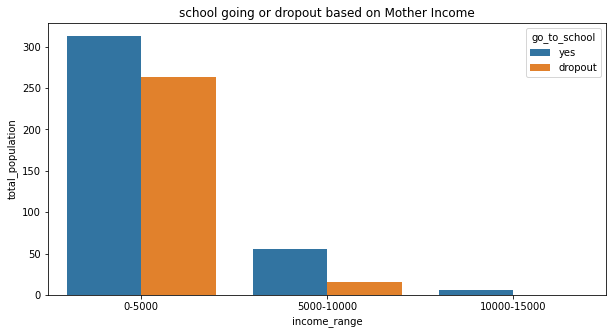

In [305]:
plt.figure(figsize=(10,5))
plt.title('school going or dropout based on Mother Income')
sns.barplot(x = 'income_range',y = 'total_population',hue = 'go_to_school',data = Mother_income)
plt.show()

Text(0.5, 1.0, 'Go to school based on Mother Income')

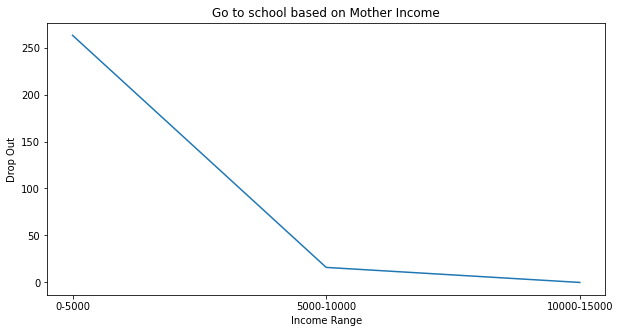

In [306]:
x = ['0-5000','5000-10000','10000-15000']
y = [in_5_no,in_10_no,in_15_no]
plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.xlabel("Income Range")
plt.ylabel('Drop Out')
plt.title('Go to school based on Mother Income')

##Father Mother Education

In [307]:
df['F. education (class)'].unique()

array([10,  5,  9, 12, 11,  8,  7,  6,  4])

In [308]:
in_4_yes = 0
in_4_no = 0
in_5_yes = 0
in_5_no = 0
in_6_yes = 0
in_6_no = 0
in_7_yes = 0
in_7_no = 0
in_8_yes = 0
in_8_no = 0
in_9_yes = 0
in_9_no = 0
in_10_yes = 0
in_10_no = 0
in_11_yes = 0
in_11_no = 0
in_12_yes = 0
in_12_no = 0

In [309]:
for i in range(len(df)):

  if df['F. education (class)'][i]==4:
    if df['Go to School'][i] == 1:
      in_4_yes = in_4_yes+1
    else:
      in_4_no = in_4_no+1

  elif df['F. education (class)'][i] == 5:
    if df['Go to School'][i] == 1:
      in_5_yes = in_5_yes+1
    else:
      in_5_no = in_5_no+1

  elif df['F. education (class)'][i]==6:
    if df['Go to School'][i] == 1:
      in_6_yes = in_6_yes+1
    else:
      in_6_no = in_6_no+1

  elif df['F. education (class)'][i]==7:
    if df['Go to School'][i] == 1:
      in_7_yes = in_7_yes+1
    else:
      in_7_no = in_7_no+1

  elif df['F. education (class)'][i]==8:
    if df['Go to School'][i] == 1:
      in_8_yes = in_8_yes+1
    else:
      in_8_no = in_8_no+1
  
  elif df['F. education (class)'][i]==9:
    if df['Go to School'][i] == 1:
      in_9_yes = in_9_yes+1
    else:
      in_9_no = in_9_no+1

  elif df['F. education (class)'][i]==10:
    if df['Go to School'][i] == 1:
      in_10_yes = in_10_yes+1
    else:
      in_10_no = in_10_no+1

  elif df['F. education (class)'][i]==11:
    if df['Go to School'][i] == 1:
      in_11_yes = in_11_yes+1
    else:
      in_11_no = in_11_no+1
  
  elif df['F. education (class)'][i]==12:
    if df['Go to School'][i] == 1:
      in_12_yes = in_12_yes+1
    else:
      in_12_no = in_12_no+1

In [310]:
edu_father = []
edu_father.append({
    'Father_education_class': '4',
    'total_population': in_4_yes,
    'go_to_school': 'yes'
})
edu_father.append({
    'Father_education_class': '4',
    'total_population': in_4_no,
    'go_to_school': 'dropout'
})
edu_father.append({
    'Father_education_class': '5',
    'total_population': in_5_yes,
    'go_to_school': 'yes'
})
edu_father.append({
    'Father_education_class': '5',
    'total_population': in_5_no,
    'go_to_school': 'dropout'
})
edu_father.append({
    'Father_education_class': '6',
    'total_population': in_6_yes,
    'go_to_school': 'yes'
})
edu_father.append({
    'Father_education_class': '6',
    'total_population': in_6_no,
    'go_to_school': 'dropout'
})
edu_father.append({
    'Father_education_class': '7',
    'total_population': in_7_yes,
    'go_to_school': 'yes'
})
edu_father.append({
    'Father_education_class': '7',
    'total_population': in_7_no,
    'go_to_school': 'dropout'
})
edu_father.append({
    'Father_education_class': '8',
    'total_population': in_8_yes,
    'go_to_school': 'yes'
})
edu_father.append({
    'Father_education_class': '8',
    'total_population': in_8_no,
    'go_to_school': 'dropout'
})
edu_father.append({
    'Father_education_class': '9',
    'total_population': in_9_yes,
    'go_to_school': 'yes'
})
edu_father.append({
    'Father_education_class': '9',
    'total_population': in_9_no,
    'go_to_school': 'dropout'
})
edu_father.append({
    'Father_education_class': '10',
    'total_population': in_10_yes,
    'go_to_school': 'yes'
})
edu_father.append({
    'Father_education_class': '10',
    'total_population': in_10_no,
    'go_to_school': 'dropout'
})
edu_father.append({
    'Father_education_class': '11',
    'total_population': in_11_yes,
    'go_to_school': 'yes'
})
edu_father.append({
    'Father_education_class': '11',
    'total_population': in_11_no,
    'go_to_school': 'dropout'
})
edu_father.append({
    'Father_education_class': '12',
    'total_population': in_12_yes,
    'go_to_school': 'yes'
})
edu_father.append({
    'Father_education_class': '12',
    'total_population': in_12_no,
    'go_to_school': 'dropout'
})
edu_father = pd.DataFrame(edu_father)
edu_father

,Father_education_class,total_population,go_to_school
0,4,0,yes
1,4,2,dropout
2,5,29,yes
3,5,23,dropout
4,6,9,yes
5,6,7,dropout
6,7,14,yes
7,7,16,dropout
8,8,100,yes
9,8,110,dropout


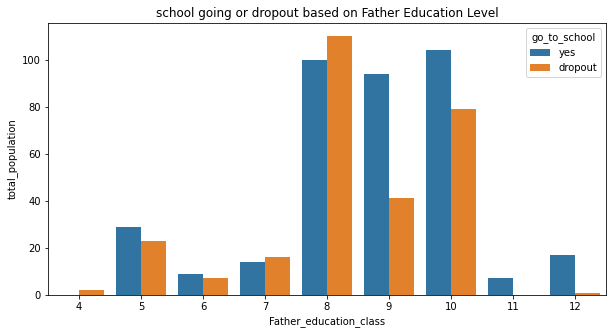

In [311]:
plt.figure(figsize=(10,5))
plt.title('school going or dropout based on Father Education Level')
sns.barplot(x = 'Father_education_class',y = 'total_population',hue = 'go_to_school',data = edu_father)
plt.show()

Text(0.5, 1.0, 'Go to school based on Father Education Level')

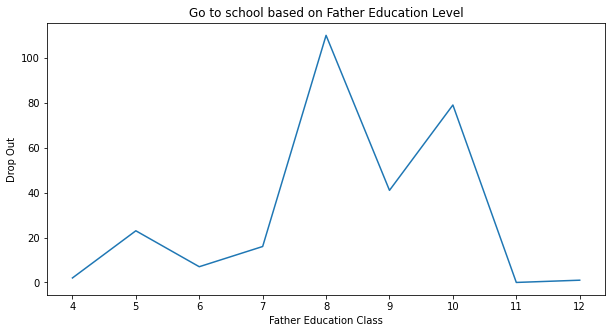

In [312]:
x = [4,5,6,7,8,9,10,11,12]
y = [in_4_no,in_5_no,in_6_no,in_7_no,in_8_no,in_9_no,in_10_no,in_11_no,in_12_no]
plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.xlabel("Father Education Class")
plt.ylabel('Drop Out')
plt.title('Go to school based on Father Education Level')

In [313]:
df['M. education (class)'].unique()

array([ 8, 10,  3,  4,  5,  6,  7,  9])

In [314]:
in_0_yes = 0
in_0_no = 0
in_3_yes = 0
in_3_no = 0
in_4_yes = 0
in_4_no = 0
in_5_yes = 0
in_5_no = 0
in_6_yes = 0
in_6_no = 0
in_7_yes = 0
in_7_no = 0
in_8_yes = 0
in_8_no = 0
in_9_yes = 0
in_9_no = 0
in_10_yes = 0
in_10_no = 0

In [315]:
for i in range(len(df)):

  if df['M. education (class)'][i]==3:
    if df['Go to School'][i] == 1:
      in_3_yes = in_3_yes+1
    else:
      in_3_no = in_3_no+1

  elif df['M. education (class)'][i]==4:
    if df['Go to School'][i] == 1:
      in_4_yes = in_4_yes+1
    else:
      in_4_no = in_4_no+1

  elif df['M. education (class)'][i] == 5:
    if df['Go to School'][i] == 1:
      in_5_yes = in_5_yes+1
    else:
      in_5_no = in_5_no+1

  elif df['M. education (class)'][i]==6:
    if df['Go to School'][i] == 1:
      in_6_yes = in_6_yes+1
    else:
      in_6_no = in_6_no+1

  elif df['M. education (class)'][i]==7:
    if df['Go to School'][i] == 1:
      in_7_yes = in_7_yes+1
    else:
      in_7_no = in_7_no+1

  elif df['M. education (class)'][i]==8:
    if df['Go to School'][i] == 1:
      in_8_yes = in_8_yes+1
    else:
      in_8_no = in_8_no+1
  
  elif df['M. education (class)'][i]==9:
    if df['Go to School'][i] == 1:
      in_9_yes = in_9_yes+1
    else:
      in_9_no = in_9_no+1

  elif df['M. education (class)'][i]==10:
    if df['Go to School'][i] == 1:
      in_10_yes = in_10_yes+1
    else:
      in_10_no = in_10_no+1

In [316]:
edu_mother = []

edu_mother.append({
    'Mother_education_class': '3',
    'total_population': in_3_yes,
    'go_to_school': 'yes'
})
edu_mother.append({
    'Mother_education_class': '3',
    'total_population': in_3_no,
    'go_to_school': 'dropout'
})
edu_mother.append({
    'Mother_education_class': '4',
    'total_population': in_4_yes,
    'go_to_school': 'yes'
})
edu_mother.append({
    'Mother_education_class': '4',
    'total_population': in_4_no,
    'go_to_school': 'dropout'
})
edu_mother.append({
    'Mother_education_class': '5',
    'total_population': in_5_yes,
    'go_to_school': 'yes'
})
edu_mother.append({
    'Mother_education_class': '5',
    'total_population': in_5_no,
    'go_to_school': 'dropout'
})
edu_mother.append({
    'Mother_education_class': '6',
    'total_population': in_6_yes,
    'go_to_school': 'yes'
})
edu_mother.append({
    'Mother_education_class': '6',
    'total_population': in_6_no,
    'go_to_school': 'dropout'
})
edu_mother.append({
    'Mother_education_class': '7',
    'total_population': in_7_yes,
    'go_to_school': 'yes'
})
edu_mother.append({
    'Mother_education_class': '7',
    'total_population': in_7_no,
    'go_to_school': 'dropout'
})
edu_mother.append({
    'Mother_education_class': '8',
    'total_population': in_8_yes,
    'go_to_school': 'yes'
})
edu_mother.append({
    'Mother_education_class': '8',
    'total_population': in_8_no,
    'go_to_school': 'dropout'
})
edu_mother.append({
    'Mother_education_class': '9',
    'total_population': in_9_yes,
    'go_to_school': 'yes'
})
edu_mother.append({
    'Mother_education_class': '9',
    'total_population': in_9_no,
    'go_to_school': 'dropout'
})
edu_mother.append({
    'Mother_education_class': '10',
    'total_population': in_10_yes,
    'go_to_school': 'yes'
})
edu_mother.append({
    'Mother_education_class': '10',
    'total_population': in_10_no,
    'go_to_school': 'dropout'
})
edu_mother = pd.DataFrame(edu_mother)
edu_mother

,Mother_education_class,total_population,go_to_school
0,3,2,yes
1,3,2,dropout
2,4,6,yes
3,4,7,dropout
4,5,66,yes
5,5,95,dropout
6,6,29,yes
7,6,43,dropout
8,7,37,yes
9,7,31,dropout


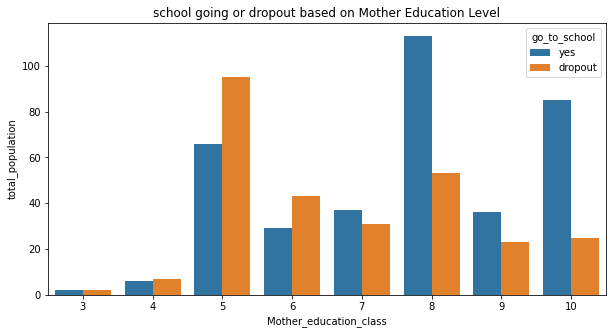

In [317]:
plt.figure(figsize=(10,5))
plt.title('school going or dropout based on Mother Education Level')
sns.barplot(x = 'Mother_education_class',y = 'total_population',hue = 'go_to_school',data = edu_mother)
plt.show()

Text(0.5, 1.0, 'Go to school based on Mother Education Level')

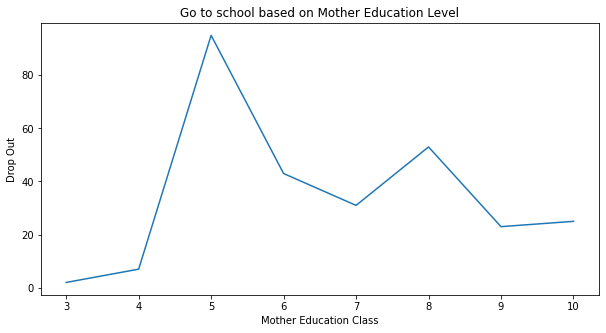

In [318]:
x = [3,4,5,6,7,8,9,10]
y = [in_3_no,in_4_no,in_5_no,in_6_no,in_7_no,in_8_no,in_9_no,in_10_no]
plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.xlabel("Mother Education Class")
plt.ylabel('Drop Out')
plt.title('Go to school based on Mother Education Level')

##Family Member

In [319]:
df['No. of family members'].unique()

array([ 4,  5,  6,  3,  7, 13,  8, 10,  9])

In [320]:
in_2_yes = 0
in_2_no = 0
in_3_yes = 0
in_3_no = 0
in_4_yes = 0
in_4_no = 0
in_5_yes = 0
in_5_no = 0
in_6_yes = 0
in_6_no = 0
in_7_yes = 0
in_7_no = 0
in_8_yes = 0
in_8_no = 0
in_9_yes = 0
in_9_no = 0
in_10_yes = 0
in_10_no = 0
in_13_yes = 0
in_13_no = 0

In [321]:
for i in range(len(df)):

  if df['No. of family members'][i]==3:
    if df['Go to School'][i] == 1:
      in_3_yes = in_3_yes+1
    else:
      in_3_no = in_3_no+1

  elif df['No. of family members'][i]==4:
    if df['Go to School'][i] == 1:
      in_4_yes = in_4_yes+1
    else:
      in_4_no = in_4_no+1

  elif df['No. of family members'][i] == 5:
    if df['Go to School'][i] == 1:
      in_5_yes = in_5_yes+1
    else:
      in_5_no = in_5_no+1

  elif df['No. of family members'][i]==6:
    if df['Go to School'][i] == 1:
      in_6_yes = in_6_yes+1
    else:
      in_6_no = in_6_no+1

  elif df['No. of family members'][i]==7:
    if df['Go to School'][i] == 1:
      in_7_yes = in_7_yes+1
    else:
      in_7_no = in_7_no+1

  elif df['No. of family members'][i]==8:
    if df['Go to School'][i] == 1:
      in_8_yes = in_8_yes+1
    else:
      in_8_no = in_8_no+1
  
  elif df['No. of family members'][i]==9:
    if df['Go to School'][i] == 1:
      in_9_yes = in_9_yes+1
    else:
      in_9_no = in_9_no+1

  elif df['No. of family members'][i]==10:
    if df['Go to School'][i] == 1:
      in_10_yes = in_10_yes+1
    else:
      in_10_no = in_10_no+1
  
  elif df['No. of family members'][i]==13:
    if df['Go to School'][i] == 1:
      in_13_yes = in_13_yes+1
    else:
      in_13_no = in_13_no+1

In [322]:
family_member = []

family_member.append({
    'Total_Family_Member': '3',
    'total_population': in_3_yes,
    'go_to_school': 'yes'
})
family_member.append({
    'Total_Family_Member': '3',
    'total_population': in_3_no,
    'go_to_school': 'dropout'
})
family_member.append({
    'Total_Family_Member': '4',
    'total_population': in_4_yes,
    'go_to_school': 'yes'
})
family_member.append({
    'Total_Family_Member': '4',
    'total_population': in_4_no,
    'go_to_school': 'dropout'
})
family_member.append({
    'Total_Family_Member': '5',
    'total_population': in_5_yes,
    'go_to_school': 'yes'
})
family_member.append({
    'Total_Family_Member': '5',
    'total_population': in_5_no,
    'go_to_school': 'dropout'
})
family_member.append({
    'Total_Family_Member': '6',
    'total_population': in_6_yes,
    'go_to_school': 'yes'
})
family_member.append({
    'Total_Family_Member': '6',
    'total_population': in_6_no,
    'go_to_school': 'dropout'
})
family_member.append({
    'Total_Family_Member': '7',
    'total_population': in_7_yes,
    'go_to_school': 'yes'
})
family_member.append({
    'Total_Family_Member': '7',
    'total_population': in_7_no,
    'go_to_school': 'dropout'
})
family_member.append({
    'Total_Family_Member': '8',
    'total_population': in_8_yes,
    'go_to_school': 'yes'
})
family_member.append({
    'Total_Family_Member': '8',
    'total_population': in_8_no,
    'go_to_school': 'dropout'
})
family_member.append({
    'Total_Family_Member': '9',
    'total_population': in_9_yes,
    'go_to_school': 'yes'
})
family_member.append({
    'Total_Family_Member': '9',
    'total_population': in_9_no,
    'go_to_school': 'dropout'
})
family_member.append({
    'Total_Family_Member': '10',
    'total_population': in_10_yes,
    'go_to_school': 'yes'
})
family_member.append({
    'Total_Family_Member': '10',
    'total_population': in_10_no,
    'go_to_school': 'dropout'
})
family_member.append({
    'Total_Family_Member': '13',
    'total_population': in_13_yes,
    'go_to_school': 'yes'
})
family_member.append({
    'Total_Family_Member': '13',
    'total_population': in_13_no,
    'go_to_school': 'dropout'
})
family_member = pd.DataFrame(family_member)
family_member

,Total_Family_Member,total_population,go_to_school
0,3,35,yes
1,3,4,dropout
2,4,89,yes
3,4,28,dropout
4,5,119,yes
5,5,76,dropout
6,6,74,yes
7,6,69,dropout
8,7,40,yes
9,7,65,dropout


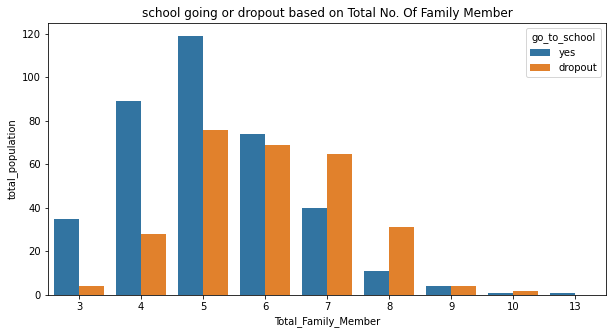

In [323]:
plt.figure(figsize=(10,5))
plt.title('school going or dropout based on Total No. Of Family Member')
sns.barplot(x = 'Total_Family_Member',y = 'total_population',hue = 'go_to_school',data = family_member)
plt.show()

Text(0.5, 1.0, 'Go to school based on Total No. Of Family Member')

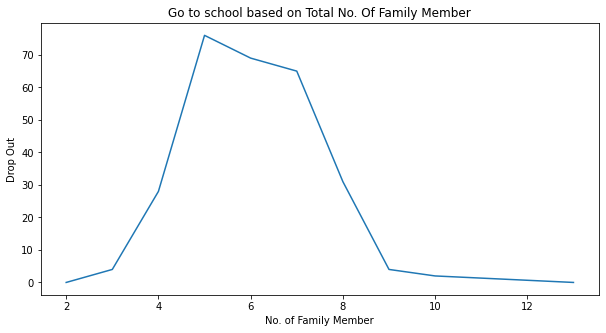

In [324]:
x = [2,3,4,5,6,7,8,9,10,13]
y = [in_2_no,in_3_no,in_4_no,in_5_no,in_6_no,in_7_no,in_8_no,in_9_no,in_10_no,in_13_no]
plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.xlabel("No. of Family Member")
plt.ylabel('Drop Out')
plt.title('Go to school based on Total No. Of Family Member')

##No. of educated family member

In [325]:
for i in range(len(df)):
  if df['F. education (class)'][i]==10:
    if df['No. of edu. Family member ( up to 10)'][i]>0:
      df['No. of edu. Family member ( up to 10)'][i] = df['No. of edu. Family member ( up to 10)'][i]-1
    else:
      pass

  if df['M. education (class)'][i]==10:
    if df['No. of edu. Family member ( up to 10)'][i]>0:
      df['No. of edu. Family member ( up to 10)'][i] = df['No. of edu. Family member ( up to 10)'][i]-1
    else:
      pass

In [326]:
in_0_yes = 0
in_0_no = 0
in_1_yes = 0
in_1_no = 0
in_2_yes = 0
in_2_no = 0
in_3_yes = 0
in_3_no = 0
in_4_yes = 0
in_4_no = 0
in_5_yes = 0
in_5_no = 0

In [327]:
for i in range(len(df)):

  if df['No. of edu. Family member ( up to 10)'][i]==0:
    if df['Go to School'][i] == 1:
      in_0_yes = in_0_yes+1
    else:
      in_0_no = in_0_no+1

  elif df['No. of edu. Family member ( up to 10)'][i] == 1:
    if df['Go to School'][i] == 1:
      in_1_yes = in_1_yes+1
    else:
      in_1_no = in_1_no+1

  elif df['No. of edu. Family member ( up to 10)'][i]==2:
    if df['Go to School'][i] == 1:
      in_2_yes = in_2_yes+1
    else:
      in_2_no = in_2_no+1

  elif df['No. of edu. Family member ( up to 10)'][i]==3:
    if df['Go to School'][i] == 1:
      in_3_yes = in_3_yes+1
    else:
      in_3_no = in_3_no+1

  elif df['No. of edu. Family member ( up to 10)'][i]==4:
    if df['Go to School'][i] == 1:
      in_4_yes = in_4_yes+1
    else:
      in_4_no = in_4_no+1
  
  elif df['No. of edu. Family member ( up to 10)'][i]==5:
    if df['Go to School'][i] == 1:
      in_5_yes = in_5_yes+1
    else:
      in_5_no = in_5_no+1

In [328]:
edu_adult = []
edu_adult.append({
    'no_edu_adult': '0',
    'total_population': in_0_yes,
    'go_to_school': 'yes'
})
edu_adult.append({
    'no_edu_adult': '0',
    'total_population': in_0_no,
    'go_to_school': 'dropout'
})
edu_adult.append({
    'no_edu_adult': '1',
    'total_population': in_1_yes,
    'go_to_school': 'yes'
})
edu_adult.append({
    'no_edu_adult': '1',
    'total_population': in_1_no,
    'go_to_school': 'dropout'
})
edu_adult.append({
    'no_edu_adult': '2',
    'total_population': in_2_yes,
    'go_to_school': 'yes'
})
edu_adult.append({
    'no_edu_adult': '2',
    'total_population': in_2_no,
    'go_to_school': 'dropout'
})
edu_adult.append({
    'no_edu_adult': '3',
    'total_population': in_3_yes,
    'go_to_school': 'yes'
})
edu_adult.append({
    'no_edu_adult': '3',
    'total_population': in_3_no,
    'go_to_school': 'dropout'
})
edu_adult.append({
    'no_edu_adult': '4',
    'total_population': in_4_yes,
    'go_to_school': 'yes'
})
edu_adult.append({
    'no_edu_adult': '4',
    'total_population': in_4_no,
    'go_to_school': 'dropout'
})
edu_adult.append({
    'no_edu_adult': '5',
    'total_population': in_5_yes,
    'go_to_school': 'yes'
})
edu_adult.append({
    'no_edu_adult': '5',
    'total_population': in_5_no,
    'go_to_school': 'dropout'
})
edu_adult = pd.DataFrame(edu_adult)
edu_adult

,no_edu_adult,total_population,go_to_school
0,0,85,yes
1,0,54,dropout
2,1,110,yes
3,1,83,dropout
4,2,119,yes
5,2,74,dropout
6,3,53,yes
7,3,51,dropout
8,4,7,yes
9,4,14,dropout


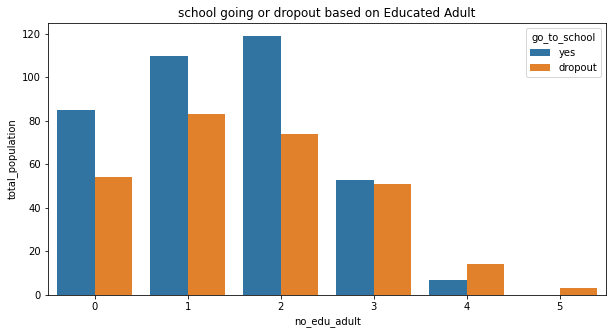

In [329]:
plt.figure(figsize=(10,5))
plt.title('school going or dropout based on Educated Adult')
sns.barplot(x = 'no_edu_adult',y = 'total_population',hue = 'go_to_school',data = edu_adult)
plt.show()

Text(0.5, 1.0, 'Go to school based on Educated Adult')

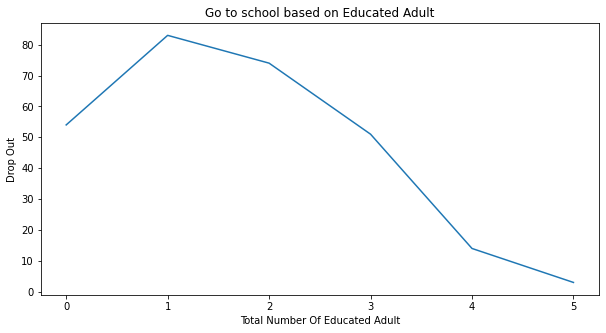

In [330]:
x = ['0','1','2','3','4','5']
y = [in_0_no,in_1_no,in_2_no,in_3_no,in_4_no,in_5_no]
plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.xlabel("Total Number Of Educated Adult")
plt.ylabel('Drop Out')
plt.title('Go to school based on Educated Adult')

##Gender

In [331]:
# df.Gender.unique()

In [332]:
# male_yes = 0
# male_no = 0
# female_yes = 0
# female_no = 0

In [333]:
# for i in range(len(df)):

#   if df.Gender[i]==1:
#     if df['Go to School'][i] == 1:
#       male_yes = male_yes+1
#     else:
#       male_no = male_no+1

#   elif df.Gender[i] == 0:
#     if df['Go to School'][i] == 1:
#       female_yes = female_yes+1
#     else:
#       female_no = female_no+1

In [334]:
# gender = []
# gender.append({
#     'Gender': 'male',
#     'total_population': male_yes,
#     'go_to_school': 'yes'
# })
# gender.append({
#     'Gender': 'male',
#     'total_population': male_no,
#     'go_to_school': 'dropout'
# })
# gender.append({
#     'Gender': 'female',
#     'total_population': female_yes,
#     'go_to_school': 'yes'
# })
# gender.append({
#     'Gender': 'female',
#     'total_population': female_no,
#     'go_to_school': 'dropout'
# })

# gender = pd.DataFrame(gender)
# gender

In [335]:
# plt.figure(figsize=(10,5))
# plt.title('school going or dropout based on Gender')
# sns.barplot(x = 'Gender',y = 'total_population',hue = 'go_to_school',data = gender)
# plt.show()

In [336]:
# x = ['male','female']
# y = [male_no,female_no]
# plt.figure(figsize=(10,5))
# plt.plot(x,y)
# plt.xlabel("Gender")
# plt.ylabel('Drop Out')
# plt.title('Go to school based on Father Education Level')

##Neighbour

In [337]:
df.Neighbour.unique()

array([4, 1, 3, 2, 7, 6, 5, 8])

In [338]:
in_1_yes = 0
in_1_no = 0
in_2_yes = 0
in_2_no = 0
in_3_yes = 0
in_3_no = 0
in_4_yes = 0
in_4_no = 0
in_5_yes = 0
in_5_no = 0
in_6_yes = 0
in_6_no = 0
in_7_yes = 0
in_7_no = 0
in_8_yes = 0
in_8_no = 0

In [339]:
for i in range(len(df)):

  if df.Neighbour[i] == 1:
    if df['Go to School'][i] == 1:
      in_1_yes = in_1_yes+1
    else:
      in_1_no = in_1_no+1

  elif df.Neighbour[i]==2:
    if df['Go to School'][i] == 1:
      in_2_yes = in_2_yes+1
    else:
      in_2_no = in_2_no+1

  elif df.Neighbour[i]==3:
    if df['Go to School'][i] == 1:
      in_3_yes = in_3_yes+1
    else:
      in_3_no = in_3_no+1

  elif df.Neighbour[i]==4:
    if df['Go to School'][i] == 1:
      in_4_yes = in_4_yes+1
    else:
      in_4_no = in_4_no+1
  
  elif df.Neighbour[i]==5:
    if df['Go to School'][i] == 1:
      in_5_yes = in_5_yes+1
    else:
      in_5_no = in_5_no+1
  
  elif df.Neighbour[i]==6:
    if df['Go to School'][i] == 1:
      in_6_yes = in_6_yes+1
    else:
      in_6_no = in_6_no+1

  elif df.Neighbour[i]==7:
    if df['Go to School'][i] == 1:
      in_7_yes = in_7_yes+1
    else:
      in_7_no = in_7_no+1
  
  elif df.Neighbour[i]==8:
    if df['Go to School'][i] == 1:
      in_8_yes = in_8_yes+1
    else:
      in_8_no = in_8_no+1

In [340]:
neighbour = []
neighbour.append({
    'neighbour': '1',
    'total_population': in_1_yes,
    'go_to_school': 'yes'
})
neighbour.append({
    'neighbour': '1',
    'total_population': in_1_no,
    'go_to_school': 'dropout'
})
neighbour.append({
    'neighbour': '2',
    'total_population': in_2_yes,
    'go_to_school': 'yes'
})
neighbour.append({
    'neighbour': '2',
    'total_population': in_2_no,
    'go_to_school': 'dropout'
})
neighbour.append({
    'neighbour': '3',
    'total_population': in_3_yes,
    'go_to_school': 'yes'
})
neighbour.append({
    'neighbour': '3',
    'total_population': in_3_no,
    'go_to_school': 'dropout'
})
neighbour.append({
    'neighbour': '4',
    'total_population': in_4_yes,
    'go_to_school': 'yes'
})
neighbour.append({
    'neighbour': '4',
    'total_population': in_4_no,
    'go_to_school': 'dropout'
})
neighbour.append({
    'neighbour': '5',
    'total_population': in_5_yes,
    'go_to_school': 'yes'
})
neighbour.append({
    'neighbour': '5',
    'total_population': in_5_no,
    'go_to_school': 'dropout'
})
neighbour.append({
    'neighbour': '6',
    'total_population': in_6_yes,
    'go_to_school': 'yes'
})
neighbour.append({
    'neighbour': '6',
    'total_population': in_6_no,
    'go_to_school': 'dropout'
})
neighbour.append({
    'neighbour': '7',
    'total_population': in_7_yes,
    'go_to_school': 'yes'
})
neighbour.append({
    'neighbour': '7',
    'total_population': in_7_no,
    'go_to_school': 'dropout'
})
neighbour.append({
    'neighbour': '8',
    'total_population': in_8_yes,
    'go_to_school': 'yes'
})
neighbour.append({
    'neighbour': '8',
    'total_population': in_8_no,
    'go_to_school': 'dropout'
})
neighbour = pd.DataFrame(neighbour)
neighbour

,neighbour,total_population,go_to_school
0,1,12,yes
1,1,10,dropout
2,2,57,yes
3,2,43,dropout
4,3,103,yes
5,3,58,dropout
6,4,90,yes
7,4,83,dropout
8,5,74,yes
9,5,52,dropout


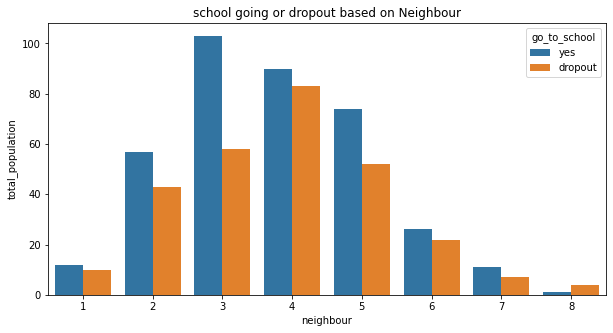

In [341]:
plt.figure(figsize=(10,5))
plt.title('school going or dropout based on Neighbour')
sns.barplot(x = 'neighbour',y = 'total_population',hue = 'go_to_school',data = neighbour)
plt.show()

Text(0.5, 1.0, 'Go to school based on Mother Income')

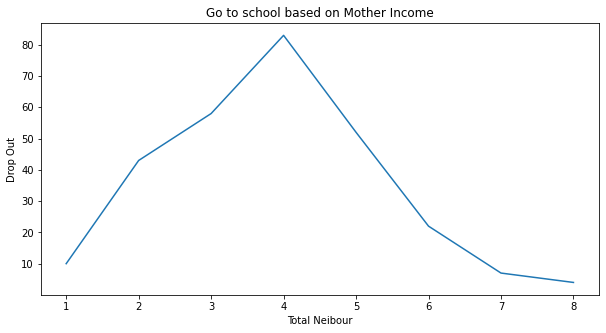

In [342]:
x = ['1','2','3','4','5','6','7','8']
y = [in_1_no,in_2_no,in_3_no,in_4_no,in_5_no,in_6_no,in_7_no,in_8_no]
plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.xlabel("Total Neibour")
plt.ylabel('Drop Out')
plt.title('Go to school based on Mother Income')

##Some Query

In [343]:
len(df[df['No. of edu. Family member ( up to 10)']>=3][df['Father Monthly Income']<=10000][df['Mother Monthly Income']==0][df['Go to School']==0])

20

In [344]:
len(df[df['No. of edu. Family member ( up to 10)']>=3][df['Father Monthly Income']==0][df['Mother Monthly Income']<=10000][df['Go to School']==0])

2

In [345]:
len(df[df['No. of edu. Family member ( up to 10)']>=3][(df['Father Monthly Income']>=5000) & (df['Father Monthly Income']<=10000) & (df['Mother Monthly Income']>=5000) & (df['Mother Monthly Income']<=10000)][df['Go to School']==0])

0

In [346]:
len(df[(df['Father Monthly Income']>=5000) & (df['Father Monthly Income']<=10000) & (df['Mother Monthly Income']>=5000) & (df['Mother Monthly Income']<=10000)][df['Go to School']==0])

1

In [347]:
final = []
final.append({
    'Query': 'edu. family member >=3 & father_in<=10000 & mother_in==0',
    'drop': 20
})
final.append({
    'Query': 'edu. family member >=3 & father_in==0 & mother_in<=10000',
    'drop': 2
})
final.append({
    'Query': 'edu. family member >=3 & father_in>=5000 & <=10000 & mother_in>=5000 & <=10000',
    'drop': 0
})
final.append({
    'Query': 'father_in>=5000 & <=10000 & mother_in>=5000 & <=10000',
    'drop': 1
})
final = pd.DataFrame(final)
final

,Query,drop
0,edu. family member >=3 & father_in<=10000 & mo...,20
1,edu. family member >=3 & father_in==0 & mother...,2
2,edu. family member >=3 & father_in>=5000 & <=1...,0
3,father_in>=5000 & <=10000 & mother_in>=5000 & ...,1


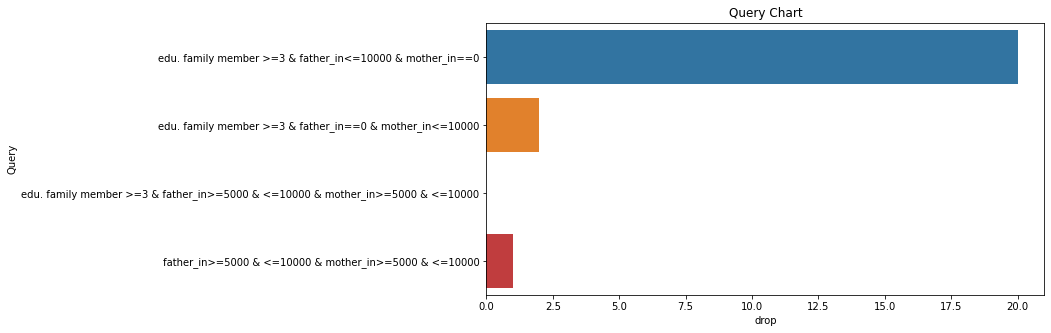

<Figure size 432x288 with 0 Axes>

In [348]:
plt.figure(figsize=(10,5))
plt.title('Query Chart')
sns.barplot(y = 'Query',x = 'drop',data = final)
plt.show()
plt.savefig('query.jpg')

##Relation of individual independent variable with dependent 'Go to School' variable

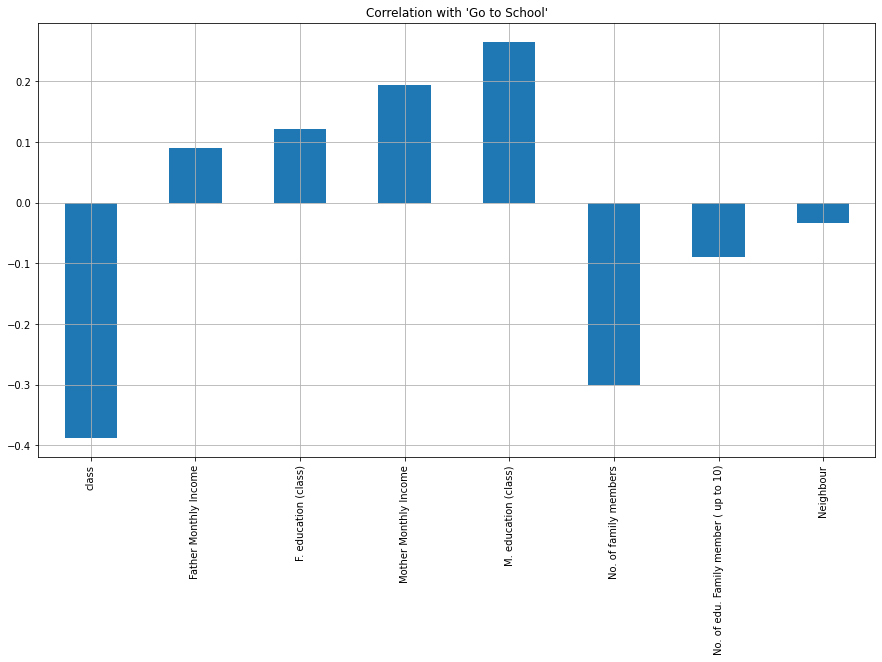

In [349]:
df.drop('Go to School', axis=1).corrwith(df['Go to School']).plot(kind='bar', grid=True, figsize=(15, 8)
, title="Correlation with 'Go to School'");
plt.savefig('relation.jpg')

#Validation 

In [350]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier() 
scoring = ['precision', 'recall', 'f1','accuracy']
scores = cross_validate(model, df.drop(['Go to School'],axis=1), df['Go to School'], cv=5,
                        scoring=scoring, return_train_score=False)
print('fit_time : '+str (np.average(scores.get('fit_time'))))
print('score_time : '+str (np.average(scores.get('score_time'))))
print('test_precision : '+str (np.average(scores.get('test_precision'))))
print('test_recall : '+str (np.average(scores.get('test_recall'))))
print('test_f1 : '+str (np.average(scores.get('test_f1'))))
print('test_accuracy : '+str (np.average(scores.get('test_accuracy'))))

fit_time : 0.19065284729003906
score_time : 0.0197967529296875
test_precision : 0.7721268795092644
test_recall : 0.7118918918918918
test_f1 : 0.6943007155240123
test_accuracy : 0.6691250733998826


In [351]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier() 
scoring = ['precision', 'recall', 'f1','accuracy']
scores = cross_validate(model, df.drop(['Go to School'],axis=1), df['Go to School'], cv=5,
                        scoring=scoring, return_train_score=False)
print('fit_time : '+str (np.average(scores.get('fit_time'))))
print('score_time : '+str (np.average(scores.get('score_time'))))
print('test_precision : '+str (np.average(scores.get('test_precision'))))
print('test_recall : '+str (np.average(scores.get('test_recall'))))
print('test_f1 : '+str (np.average(scores.get('test_f1'))))
print('test_accuracy : '+str (np.average(scores.get('test_accuracy'))))

fit_time : 0.003847026824951172
score_time : 0.005479860305786133
test_precision : 0.6974633886351382
test_recall : 0.6127567567567567
test_f1 : 0.6294882903630221
test_accuracy : 0.6002348796241926


In [352]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression() 
scoring = ['precision', 'recall', 'f1','accuracy']
scores = cross_validate(model, df.drop(['Go to School'],axis=1), df['Go to School'], cv=5,
                        scoring=scoring, return_train_score=False)
print('fit_time : '+str (np.average(scores.get('fit_time'))))
print('score_time : '+str (np.average(scores.get('score_time'))))
print('test_precision : '+str (np.average(scores.get('test_precision'))))
print('test_recall : '+str (np.average(scores.get('test_recall'))))
print('test_f1 : '+str (np.average(scores.get('test_f1'))))
print('test_accuracy : '+str (np.average(scores.get('test_accuracy'))))

fit_time : 0.02114276885986328
score_time : 0.005972719192504883
test_precision : 0.784074074074074
test_recall : 0.7624144144144145
test_f1 : 0.7483165706234871
test_accuracy : 0.7166412213740458


In [353]:
from sklearn.svm import SVC

model=SVC() 
scoring = ['precision', 'recall', 'f1','accuracy']
scores = cross_validate(model, df.drop(['Go to School'],axis=1), df['Go to School'], cv=5,
                        scoring=scoring, return_train_score=False)
print('fit_time : '+str (np.average(scores.get('fit_time'))))
print('score_time : '+str (np.average(scores.get('score_time'))))
print('test_precision : '+str (np.average(scores.get('test_precision'))))
print('test_recall : '+str (np.average(scores.get('test_recall'))))
print('test_f1 : '+str (np.average(scores.get('test_f1'))))
print('test_accuracy : '+str (np.average(scores.get('test_accuracy'))))

fit_time : 0.014965391159057618
score_time : 0.009204864501953125
test_precision : 0.5707434309994868
test_recall : 0.992
test_f1 : 0.7245655005249241
test_accuracy : 0.5681268349970641


In [354]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier() 
scoring = ['precision', 'recall', 'f1','accuracy']
scores = cross_validate(model, df.drop(['Go to School'],axis=1), df['Go to School'], cv=5,
                        scoring=scoring, return_train_score=False)
print('fit_time : '+str (np.average(scores.get('fit_time'))))
print('score_time : '+str (np.average(scores.get('score_time'))))
print('test_precision : '+str (np.average(scores.get('test_precision'))))
print('test_recall : '+str (np.average(scores.get('test_recall'))))
print('test_f1 : '+str (np.average(scores.get('test_f1'))))
print('test_accuracy : '+str (np.average(scores.get('test_accuracy'))))

fit_time : 0.0032174110412597655
score_time : 0.009713315963745117
test_precision : 0.7162273434688171
test_recall : 0.6288648648648649
test_f1 : 0.6543407841000848
test_accuracy : 0.6416911332941868


In [355]:
from sklearn.naive_bayes import GaussianNB

model=GaussianNB() 
scoring = ['precision', 'recall', 'f1','accuracy']
scores = cross_validate(model, df.drop(['Go to School'],axis=1), df['Go to School'], cv=5,
                        scoring=scoring, return_train_score=False)
print('fit_time : '+str (np.average(scores.get('fit_time'))))
print('score_time : '+str (np.average(scores.get('score_time'))))
print('test_precision : '+str (np.average(scores.get('test_precision'))))
print('test_recall : '+str (np.average(scores.get('test_recall'))))
print('test_f1 : '+str (np.average(scores.get('test_f1'))))
print('test_accuracy : '+str (np.average(scores.get('test_accuracy'))))

fit_time : 0.002991390228271484
score_time : 0.005700922012329102
test_precision : 0.8260703401696731
test_recall : 0.6607927927927928
test_f1 : 0.6881573541081976
test_accuracy : 0.6968173810921903


In [356]:
from sklearn.naive_bayes import MultinomialNB

model=MultinomialNB() 
scoring = ['precision', 'recall', 'f1','accuracy']
scores = cross_validate(model, df.drop(['Go to School'],axis=1), df['Go to School'], cv=5,
                        scoring=scoring, return_train_score=False)
print('fit_time : '+str (np.average(scores.get('fit_time'))))
print('score_time : '+str (np.average(scores.get('score_time'))))
print('test_precision : '+str (np.average(scores.get('test_precision'))))
print('test_recall : '+str (np.average(scores.get('test_recall'))))
print('test_f1 : '+str (np.average(scores.get('test_f1'))))
print('test_accuracy : '+str (np.average(scores.get('test_accuracy'))))

fit_time : 0.00435185432434082
score_time : 0.006434106826782226
test_precision : 0.7888840939331823
test_recall : 0.22475675675675677
test_f1 : 0.32396994359578113
test_accuracy : 0.5237698179682913


#Split 

In [357]:
df.sample(5)

,class,Father Monthly Income,F. education (class),Mother Monthly Income,M. education (class),No. of family members,No. of edu. Family member ( up to 10),Neighbour,Go to School
386,9,10000,8,0,7,7,3,5,1
469,7,9000,10,0,8,5,0,2,1
549,10,20000,8,0,8,7,3,3,1
540,8,9000,10,4000,8,6,2,4,1
634,5,25000,9,0,9,4,2,5,1


In [358]:
X = df.drop(['Go to School'],axis='columns')
Y = df['Go to School']
X.sample(5)

,class,Father Monthly Income,F. education (class),Mother Monthly Income,M. education (class),No. of family members,No. of edu. Family member ( up to 10),Neighbour
621,8,9000,10,0,9,4,1,4
434,5,10000,9,3000,8,7,2,5
412,10,14000,8,0,7,6,2,6
238,7,20000,4,0,5,4,1,3
632,4,32000,12,0,9,5,2,5


In [359]:
Y[:5]

0    1
1    0
2    1
3    1
4    1
Name: Go to School, dtype: int64

In [360]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=40)

In [361]:
print(len(x_train)," ",len(x_test))

522   131


In [362]:
print(len(y_train)," ",len(y_test))

522   131


In [363]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

In [364]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train,y_train)

#train data
y_pred = clf.predict(x_train)
print('Training Data:')
print('Accuracy: ', round(accuracy_score(y_train,y_pred),2))
print('f1_score: ', round(f1_score(y_train,y_pred),2))
print('precision_score: ', round(precision_score(y_train,y_pred),2))
print('recall_score: ', round(recall_score(y_train,y_pred),2))


#test data
y_pred = clf.predict(x_test)
print('\nTesting Data:')
print('Accuracy: ', round(accuracy_score(y_test,y_pred),2))
print('f1_score: ', round(f1_score(y_test,y_pred),2))
print('precision_score: ', round(precision_score(y_test,y_pred),2))
print('recall_score: ', round(recall_score(y_test,y_pred),2))

Training Data:
Accuracy:  0.74
f1_score:  0.78
precision_score:  0.77
recall_score:  0.8

Testing Data:
Accuracy:  0.68
f1_score:  0.72
precision_score:  0.71
recall_score:  0.73


In [365]:
y_predict = clf.predict(x_test)
cm = confusion_matrix(y_test,y_predict)
print(cm)

[[36 22]
 [20 53]]


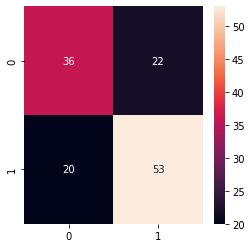

In [366]:
plt.figure(figsize=(4,4))
sns.heatmap(cm,annot=True)
# plt.xlabel('y_predict')
# plt.ylabel('y_test')
plt.show()

In [367]:
y_predict = clf.predict(x_train)
cm = confusion_matrix(y_train,y_predict)
print(cm)

[[148  73]
 [ 61 240]]


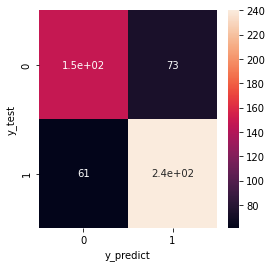

In [368]:
plt.figure(figsize=(4,4))
sns.heatmap(cm,annot=True)
plt.xlabel('y_predict')
plt.ylabel('y_test')
plt.show()

In [369]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

#train data
y_pred = clf.predict(x_train)
print('Training Data:')
print('Accuracy: ', round(accuracy_score(y_train,y_pred),2))
print('f1_score: ', round(f1_score(y_train,y_pred),2))
print('precision_score: ', round(precision_score(y_train,y_pred),2))
print('recall_score: ', round(recall_score(y_train,y_pred),2))


#test data
y_pred = clf.predict(x_test)
print('\nTesting Data:')
print('Accuracy: ', round(accuracy_score(y_test,y_pred),2))
print('f1_score: ', round(f1_score(y_test,y_pred),2))
print('precision_score: ', round(precision_score(y_test,y_pred),2))
print('recall_score: ', round(recall_score(y_test,y_pred),2))

Training Data:
Accuracy:  1.0
f1_score:  1.0
precision_score:  1.0
recall_score:  1.0

Testing Data:
Accuracy:  0.81
f1_score:  0.83
precision_score:  0.82
recall_score:  0.84


In [370]:

y_predict = clf.predict(x_test)
cm = confusion_matrix(y_test,y_predict)
print(cm)

[[45 13]
 [12 61]]


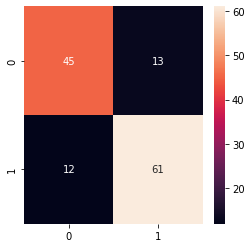

In [371]:
plt.figure(figsize=(4,4))
sns.heatmap(cm,annot=True)
# plt.xlabel('y_predict')
# plt.ylabel('y_test')
plt.show()

In [372]:
y_predict = clf.predict(x_train)
cm = confusion_matrix(y_train,y_predict)
print(cm)

[[221   0]
 [  0 301]]


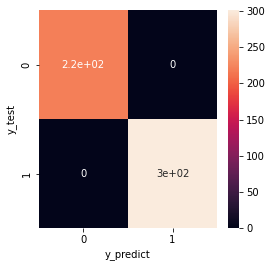

In [373]:
plt.figure(figsize=(4,4))
sns.heatmap(cm,annot=True)
plt.xlabel('y_predict')
plt.ylabel('y_test')
plt.show()

In [374]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(x_train,y_train)

#train data
y_pred = clf.predict(x_train)
print('Training Data:')
print('Accuracy: ', round(accuracy_score(y_train,y_pred),2))
print('f1_score: ', round(f1_score(y_train,y_pred),2))
print('precision_score: ', round(precision_score(y_train,y_pred),2))
print('recall_score: ', round(recall_score(y_train,y_pred),2))


#test data
y_pred = clf.predict(x_test)
print('\nTesting Data:')
print('Accuracy: ', round(accuracy_score(y_test,y_pred),2))
print('f1_score: ', round(f1_score(y_test,y_pred),2))
print('precision_score: ', round(precision_score(y_test,y_pred),2))
print('recall_score: ', round(recall_score(y_test,y_pred),2))

Training Data:
Accuracy:  0.58
f1_score:  0.73
precision_score:  0.58
recall_score:  1.0

Testing Data:
Accuracy:  0.56
f1_score:  0.72
precision_score:  0.56
recall_score:  1.0


In [375]:
y_predict = clf.predict(x_test)
cm = confusion_matrix(y_test,y_predict)
print(cm)

[[ 0 58]
 [ 0 73]]


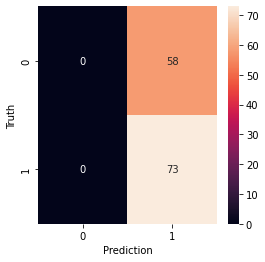

In [376]:
plt.figure(figsize=(4,4))
sns.heatmap(cm,annot=True)
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()

In [377]:
y_predict = clf.predict(x_train)
cm = confusion_matrix(y_train,y_predict)
print(cm)

[[  0 221]
 [  0 301]]


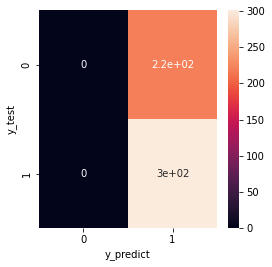

In [378]:
plt.figure(figsize=(4,4))
sns.heatmap(cm,annot=True)
plt.xlabel('y_predict')
plt.ylabel('y_test')
plt.show()

In [379]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(x_train,y_train)

#train data
y_pred = clf.predict(x_train)
print('Training Data:')
print('Accuracy: ', round(accuracy_score(y_train,y_pred),2))
print('f1_score: ', round(f1_score(y_train,y_pred),2))
print('precision_score: ', round(precision_score(y_train,y_pred),2))
print('recall_score: ', round(recall_score(y_train,y_pred),2))


#test data
y_pred = clf.predict(x_test)
print('\nTesting Data:')
print('Accuracy: ', round(accuracy_score(y_test,y_pred),2))
print('f1_score: ', round(f1_score(y_test,y_pred),2))
print('precision_score: ', round(precision_score(y_test,y_pred),2))
print('recall_score: ', round(recall_score(y_test,y_pred),2))

Training Data:
Accuracy:  0.79
f1_score:  0.82
precision_score:  0.83
recall_score:  0.8

Testing Data:
Accuracy:  0.68
f1_score:  0.7
precision_score:  0.74
recall_score:  0.66


In [380]:
y_predict = clf.predict(x_test)
cm = confusion_matrix(y_test,y_predict)
print(cm)


[[41 17]
 [25 48]]


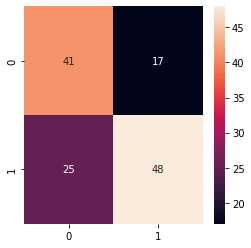

In [381]:
plt.figure(figsize=(4,4))
sns.heatmap(cm,annot=True)
# plt.xlabel('y_predict')
# plt.ylabel('y_test')
plt.show()

In [382]:
y_predict = clf.predict(x_train)
cm = confusion_matrix(y_train,y_predict)
print(cm)

[[172  49]
 [ 60 241]]


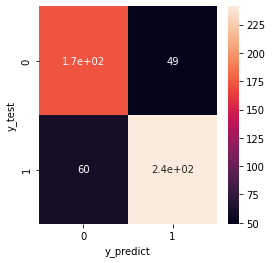

In [383]:
plt.figure(figsize=(4,4))
sns.heatmap(cm,annot=True)
plt.xlabel('y_predict')
plt.ylabel('y_test')
plt.show()

In [384]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

#train data
y_pred = clf.predict(x_train)
print('Training Data:')
print('Accuracy: ', round(accuracy_score(y_train,y_pred),2))
print('f1_score: ', round(f1_score(y_train,y_pred),2))
print('precision_score: ', round(precision_score(y_train,y_pred),2))
print('recall_score: ', round(recall_score(y_train,y_pred),2))


#test data
y_pred = clf.predict(x_test)
print('\nTesting Data:')
print('Accuracy: ', round(accuracy_score(y_test,y_pred),2))
print('f1_score: ', round(f1_score(y_test,y_pred),2))
print('precision_score: ', round(precision_score(y_test,y_pred),2))
print('recall_score: ', round(recall_score(y_test,y_pred),2))

Training Data:
Accuracy:  1.0
f1_score:  1.0
precision_score:  1.0
recall_score:  1.0

Testing Data:
Accuracy:  0.79
f1_score:  0.81
precision_score:  0.79
recall_score:  0.84


In [385]:
y_predict = clf.predict(x_test)
cm = confusion_matrix(y_test,y_predict)
print(cm)

[[42 16]
 [12 61]]


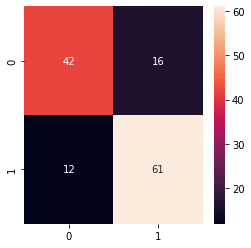

In [386]:
plt.figure(figsize=(4,4))
sns.heatmap(cm,annot=True)
# plt.xlabel('y_predict')
# plt.ylabel('y_test')
plt.show()

In [387]:
y_predict = clf.predict(x_train)
cm = confusion_matrix(y_train,y_predict)
print(cm)


[[221   0]
 [  0 301]]


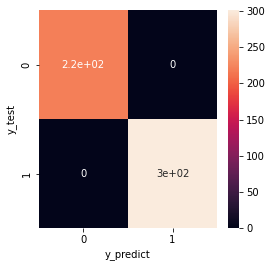

In [388]:
plt.figure(figsize=(4,4))
sns.heatmap(cm,annot=True)
plt.xlabel('y_predict')
plt.ylabel('y_test')
plt.show()

In [389]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train,y_train)

#train data
y_pred = clf.predict(x_train)
print('Training Data:')
print('Accuracy: ', round(accuracy_score(y_train,y_pred),2))
print('f1_score: ', round(f1_score(y_train,y_pred),2))
print('precision_score: ', round(precision_score(y_train,y_pred),2))
print('recall_score: ', round(recall_score(y_train,y_pred),2))


#test data
y_pred = clf.predict(x_test)
print('\nTesting Data:')
print('Accuracy: ', round(accuracy_score(y_test,y_pred),2))
print('f1_score: ', round(f1_score(y_test,y_pred),2))
print('precision_score: ', round(precision_score(y_test,y_pred),2))
print('recall_score: ', round(recall_score(y_test,y_pred),2))


Training Data:
Accuracy:  0.74
f1_score:  0.75
precision_score:  0.82
recall_score:  0.69

Testing Data:
Accuracy:  0.73
f1_score:  0.75
precision_score:  0.76
recall_score:  0.74


In [390]:
y_predict = clf.predict(x_test)
cm = confusion_matrix(y_test,y_predict)
print(cm)


[[41 17]
 [19 54]]


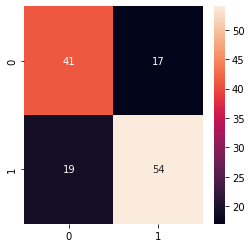

In [391]:
plt.figure(figsize=(4,4))
sns.heatmap(cm,annot=True)
# plt.xlabel('y_predict')
# plt.ylabel('y_test')
plt.show()

In [392]:
y_predict = clf.predict(x_train)
cm = confusion_matrix(y_train,y_predict)
print(cm)

[[176  45]
 [ 92 209]]


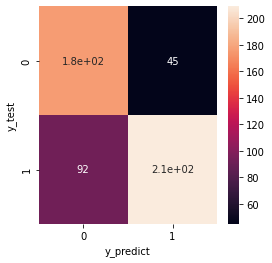

In [393]:
plt.figure(figsize=(4,4))
sns.heatmap(cm,annot=True)
plt.xlabel('y_predict')
plt.ylabel('y_test')
plt.show()

In [394]:
# model = RandomForestClassifier().fit(x_train,y_train)

In [395]:
# import pickle
# pickle.dump(model,open('Model.pkl','wb'))

In [396]:
# clf = pickle.load(open('Model.pkl','rb'))

In [397]:
# # x_test
# data = [6,20000,8,0,8,4,2,2]

In [398]:
# x_test

In [399]:
# result = clf.predict([data])
# if result == 1:
#   print('Child Will Go to School')
# else:
#   print('Child Will Drop Out From School')

In [400]:
# result_prob = clf.predict_proba([data])
# print("Possibility of Going School is about "+str(round(result_prob[0][1]*100))+'%')
# print("Possibility of Drop Out From School is about "+str(round(result_prob[0][0]*100))+'%')